# ISP Customer Retention Prediction

## Importing the libraries

In [34]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from matplotlib import pyplot as plt

## Data preprocessing

In [35]:
data = pd.read_csv('internet_service_churn.csv')
X = data.iloc[:, 1:10].values
y = data.iloc[:, -1].values

In [36]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [37]:
X = X.astype(float)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

In [40]:
XGB = XGBClassifier(n_estimators = 250, learning_rate = 0.21, random_state = 0)
XGB = XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)

## Evaluating the model

In [41]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6160  362]
 [ 480 7453]]


In [42]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9417502594258043


In [43]:
accuracies = cross_val_score(estimator = XGB, X = X_train, y = y_train, cv = StratifiedKFold(n_splits= 5))
print(f"Average Accuracy: {accuracies.mean()*100: .2f}%")
print(f"Standard Deviation of Accuracy: {accuracies.std()*100: .2f}%")

Average Accuracy:  94.31%
Standard Deviation of Accuracy:  0.19%


In [44]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.9465328930657861


In [45]:
roc = roc_auc_score(y_test, y_pred)
print(roc)

0.9419944047651766


## Generating the ROC Curve

In [46]:
y_score = XGB.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

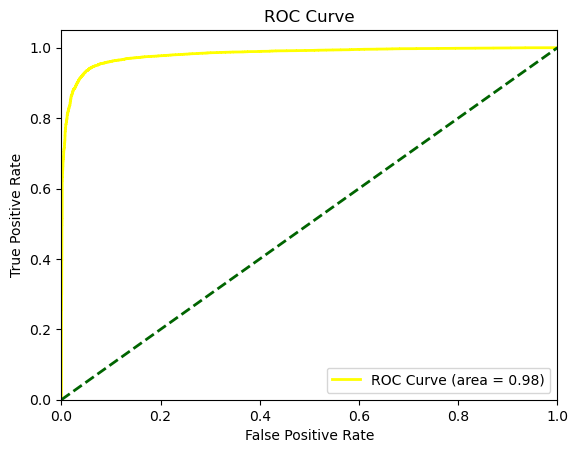

In [47]:
plt.figure()
plt.plot(fpr, tpr, color = 'yellow', lw = 2, label = f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'darkgreen', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()